In [29]:
%matplotlib notebook

from modsim import *

In [30]:
m = UNITS.meter
s = UNITS.seconds
kg = UNITS.kilogram

In [31]:
condition = Condition(height = 4000 * m,
                      v_init = 0 * m / s,
                      g = 9.8 * m/s**2,
                      mass = 85 * kg, #person avg weight with avg weight chute
                      surface_area_person = 1.75 * m**2,
                      surface_area_chute = 18 * m**2,
                      rho = 1.112 * kg/m**3,
                      v_term_person = 54.2 * m / s,
                      v_term_chute = 8 * m / s,
                      duration = 300 * s)

In [32]:
def make_system(condition, starting_free_fall):
    unpack(condition)
    
    init = State(y=height, v=v_init)
    C_d_person = 2 * mass * g / (rho * surface_area_person * v_term_person**2)
    C_d_chute = 2 * mass * g / (rho * surface_area_chute * v_term_chute**2)
    ts = linspace(0, duration, 201)
    opening_duration = 20 * s
    
    return System(init=init, g=g, mass=mass, rho=rho, 
                  C_d_person=C_d_person, C_d_chute = C_d_chute, 
                  surface_area_person=surface_area_person, 
                  surface_area_chute = surface_area_chute, 
                  ts=ts, free_fall=starting_free_fall, opening_duration=opening_duration)

In [33]:
system = make_system(condition, starting_free_fall = 40)

In [58]:
def plot_position(results):
    
    plot(system.results.y, label='y')
        
    decorate(xlabel='Time (s)',
             ylabel='Position (m)')

In [59]:
def slope_func(state, t, system):
    y, v = state
    unpack(system)
    
   
    
    F_drag_person = 1/2 * rho * v**2 * surface_area_person * C_d_person
    
    F_drag_chute = 1/2 * rho * v**2 * surface_area_chute * C_d_chute
    
    a_drag_person = F_drag_person / mass
    
    a_drag_chute = F_drag_chute / mass
    
    delta_surface_area = (surface_area_chute / (opening_duration)) 
    #change 90 to parmeter when sweeping
    
    surface_area_changing = delta_surface_area * (t - free_fall) + surface_area_person
    
    F_drag_chute_changing = 1/2 * rho * v**2 * surface_area_changing * C_d_chute
    
    a_drag_chute_changing = F_drag_chute_changing / mass

    if t <= free_fall:
        dydt = v
        dvdt = -g + a_drag_person
    elif t <= (free_fall + opening_duration):
        dydt = v
        dvdt = -g + a_drag_person + a_drag_chute_changing
    else:
        dydt = v
        dvdt = -g + a_drag_person + a_drag_chute

    
    return dydt, dvdt

In [64]:
def parameter_sweep():
    newfig()
    free_fall = linspace(10 * s, 70 * s, 7)
    
    for i in free_fall:
        system = make_system(condition, i)
        run_odeint(system, slope_func)
        plot_position(system.results)

<IPython.core.display.Javascript object>


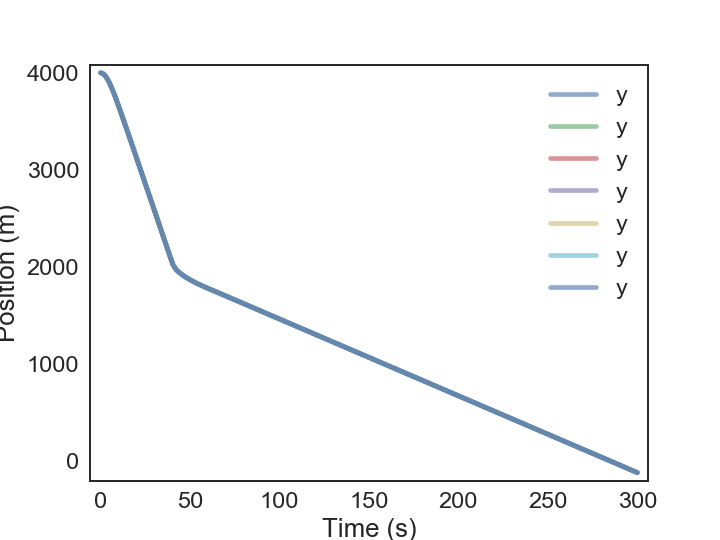

In [65]:
parameter_sweep()

                 y          v
0.0    4000.000000   0.000000
1.5    3989.107575 -14.349860
3.0    3957.906795 -26.819747
4.5    3910.110757 -36.400752
6.0    3850.160366 -43.088913
7.5    3782.008391 -47.451164
9.0    3708.625483 -50.171693
10.5   3632.025912 -51.821211
12.0   3553.492682 -52.804313
13.5   3473.812904 -53.384247
15.0   3393.458830 -53.724278
16.5   3312.710106 -53.922940
18.0   3231.731044 -54.038764
19.5   3150.617773 -54.106210
21.0   3069.426378 -54.145457
22.5   2988.189531 -54.168286
24.0   2906.926250 -54.181561
25.5   2825.647598 -54.189280
27.0   2744.360009 -54.193768
28.5   2663.067224 -54.196377
30.0   2581.771419 -54.197894
31.5   2500.473857 -54.198776
33.0   2419.175275 -54.199288
34.5   2337.876099 -54.199586
36.0   2256.576578 -54.199759
37.5   2175.276856 -54.199860
39.0   2093.977018 -54.199919
40.5   2017.070711 -38.356183
42.0   1975.393132 -21.251234
43.5   1947.861546 -16.243876
...            ...        ...
256.5   222.928358  -7.914254
258.0   21

<IPython.core.display.Javascript object>


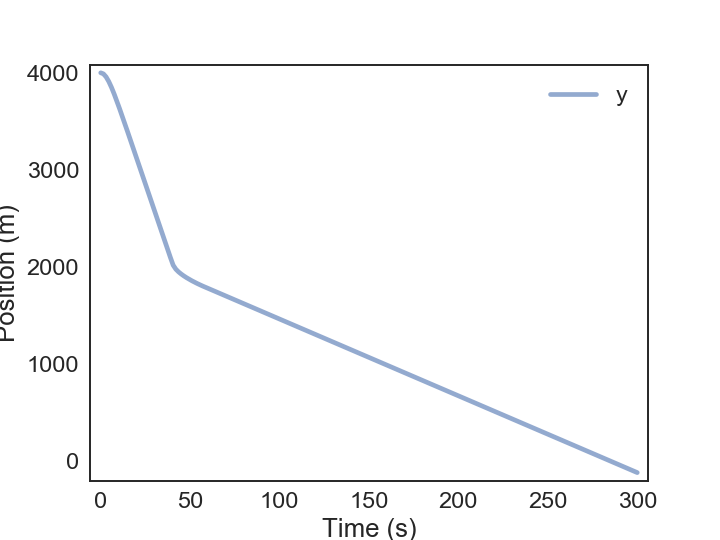

In [39]:
results = run_odeint(system, slope_func)
print(system.results)
plot_position(system.results)